In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt


# Pregunta 1

In [381]:
# Create a SQL connection to our SQLite database
conn = sqlite3.connect("database.sqlite")
tables = ['Country', 'League', 'Match', 'Team', 'Team_Attributes',
          'Player', 'Player_Attributes']
cur = conn.cursor()

# Vemos las tabla y el nombre de sus columnas
for t in tables:
    cur.execute('select * from '+t)
    desc = cur.description
    print(t+' columns=')
    for i in desc:
        print(i[0])
    print('\n')

Country columns=
id
name


League columns=
id
country_id
name


Match columns=
id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_pla

# Pregunta 2

In [3]:
# Creamos la query que junta las tablas Match, Country, League y Team
match_query = '''
SELECT *
FROM Match
JOIN Country ON Match.country_id = Country.id 
JOIN League ON Match.league_id = League.id
JOIN TEAM as Home ON Match.home_team_api_id = Home.team_api_id
JOIN TEAM as Away ON Match.away_team_api_id = Away.team_api_id
'''

cur.execute(match_query)
desc = cur.description
cols = [i[0] for i in desc]

# Terminamos la conexion con la base de datos
cur.close()

In [4]:
sql_query = pd.read_sql_query(match_query, conn)
df= pd.DataFrame(sql_query, columns = cols)
df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3,10000,15005.0,SV Zulte-Waregem,ZUL,4,9994,2007.0,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,5,9984,1750.0,KSV Cercle Brugge,CEB,6,8635,229.0,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7,9991,674.0,KAA Gent,GEN,8,9998,1747.0,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,9,7947,NaN,FCV Dender EH,DEN,10,9985,232.0,Standard de Liège,STL


Como hay columnas con el mismo nombre, por ejemplo 'id', crearemos un multi indexado para separar las columnas por la tabla a la que pertenecen

In [5]:
def multi_index(cols, tables_query,df=df):
    
    #Buscamos el comienzo de cada tabla con las columnas id, ya que cada tabla parte con una
    id_index = [i for i in range(len(cols)) if cols[i]=='id']

    #Creamos los multiindices por tabla
    multi_cols = []
    j = 0
    for i in range(len(cols)):
        if i<id_index[j+1]:
            aux = (tables_query[j],cols[i])
        elif j == len(tables_query)-2:
            aux = (tables_query[j+1],cols[i])
        else:
            aux = (tables_query[j+1],cols[i])
            j += 1
        multi_cols.append(aux)

    # Se reasignan las columnas
    df.columns = pd.MultiIndex.from_tuples(multi_cols)

In [6]:
multi_index(cols,['Match','Country', 'League','Home','Away'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 130 entries, ('Match', 'id') to ('Away', 'team_short_name')
dtypes: float64(98), int64(16), object(16)
memory usage: 25.8+ MB


# Pregunta 3

Como existen 130 columnas, luego de una inspección (visualización como la que se hace más abajo), interpretabilidad de las columnas (por ejemplo las columnas ('Match', 'B365H'), ('Match', 'B365D'), ('Match', 'B365A') y similares) y de la existencia de columnas con la misma información (por ejemplo ('Match', 'league_id') y ('League', 'id')), se decide filtrar y dejar un total de 14 columnas, que son las explicitadas a continucación.

In [ ]:
import seaborn as sns
import itertools

In [7]:
filtered_cols = [('Match', 'id'), ('Match', 'season'), ('Match', 'stage'), ('Match', 'date'), 
              ('Match', 'home_team_goal'), ('Match', 'away_team_goal'), ('Country', 'id'),
              ('Country', 'name'), ('League', 'id'), ('League', 'name'), ('Home', 'id'),
              ('Home', 'team_long_name'), ('Away', 'id'), ('Away', 'team_long_name')]
df[filtered_cols]

Match                                                       \
          id     season stage                 date home_team_goal   
0          1  2008/2009     1  2008-08-17 00:00:00              1   
1          2  2008/2009     1  2008-08-16 00:00:00              0   
2          3  2008/2009     1  2008-08-16 00:00:00              0   
3          4  2008/2009     1  2008-08-17 00:00:00              5   
4          5  2008/2009     1  2008-08-16 00:00:00              1   
...      ...        ...   ...                  ...            ...   
25974  25975  2015/2016     9  2015-09-22 00:00:00              1   
25975  25976  2015/2016     9  2015-09-23 00:00:00              1   
25976  25977  2015/2016     9  2015-09-23 00:00:00              2   
25977  25978  2015/2016     9  2015-09-22 00:00:00              0   
25978  25979  2015/2016     9  2015-09-23 00:00:00              4   

                     Country              League                            \
      away_team_goal      id         name     id                      name   
0                  1       1      Belgium      1    Belgium Jupiler League   
1                  0       1      Belgium      1    Belgium Jupiler League   
2                  3       1      Belgium      1    Belgium Jupiler League   
3                  0       1      Belgium      1    Belgium Jupiler League   
4                  3       1      Belgium      1    Belgium Jupiler League   
...              ...     ...          ...    ...                       ...   
25974              0   24558  Switzerland  24558  Switzerland Super League   
25975              2   24558  Switzerland  24558  Switzerland Super League   
25976              0   24558  Switzerland  24558  Switzerland Super League   
25977              0   24558  Switzerland  24558  Switzerland Super League   
25978              3   24558  Switzerland  24558  Switzerland Super League   

        Home                            Away                     
          id           team_long_name     id     team_long_name  
0          1                 KRC Genk      2       Beerschot AC  
1          3         SV Zulte-Waregem      4   Sporting Lokeren  
2          5        KSV Cercle Brugge      6     RSC Anderlecht  
3          7                 KAA Gent      8          RAEC Mons  
4          9            FCV Dender EH     10  Standard de Liège  
...      ...                      ...    ...                ...  
25974  49479            FC St. Gallen  49837            FC Thun  
25975  49122                 FC Vaduz  49121          FC Luzern  
25976  49115  Grasshopper Club Zürich  49120            FC Sion  
25977  51606                   Lugano  49124          FC Zürich  
25978  49117           BSC Young Boys  49118           FC Basel  

[25979 rows x 14 columns]

In [8]:
# Juntamos las columnas categóricas
cols_object = [col for col in filtered_cols if df[col].dtype == 'O']
# Juntamos las columnas numéricas
cols_numeric = list(set(filtered_cols) - set(cols_object))
cols_numeric.sort()

### Distribuciones univariadas de las variables relevantes

In [9]:
def numeric_dist(cols, ncols=3, df=df, figsize=[15, 8], w=.4, h=.4):     
    # Visualización de la distribución de los datos numéricos
    # Grilla de subplots
    fig, ax = plt.subplots(nrows=int(len(cols)/ncols)+1, ncols=ncols, figsize=figsize)
    
    # Se remueven los plots que sobran de la grilla
    list(map(lambda a : a.remove(), ax[-1,(len(cols)%ncols)-ncols:]))

    # Se ajusta el espaciado exterior de la figura
    fig.tight_layout()

    # Se define un titulo y su ubicacion
    fig.suptitle('Distribuciones Univariadas Numéricas',
                 fontsize=20, x=0.5, y=1.05)

    for axis, col in zip(ax.flatten(), cols):
        # Graficos para datos numericos
        sns.histplot(df[col], ax=axis)


    # Se ajusta el espaciado interno entre subplots
    plt.subplots_adjust(wspace=w, hspace=h)

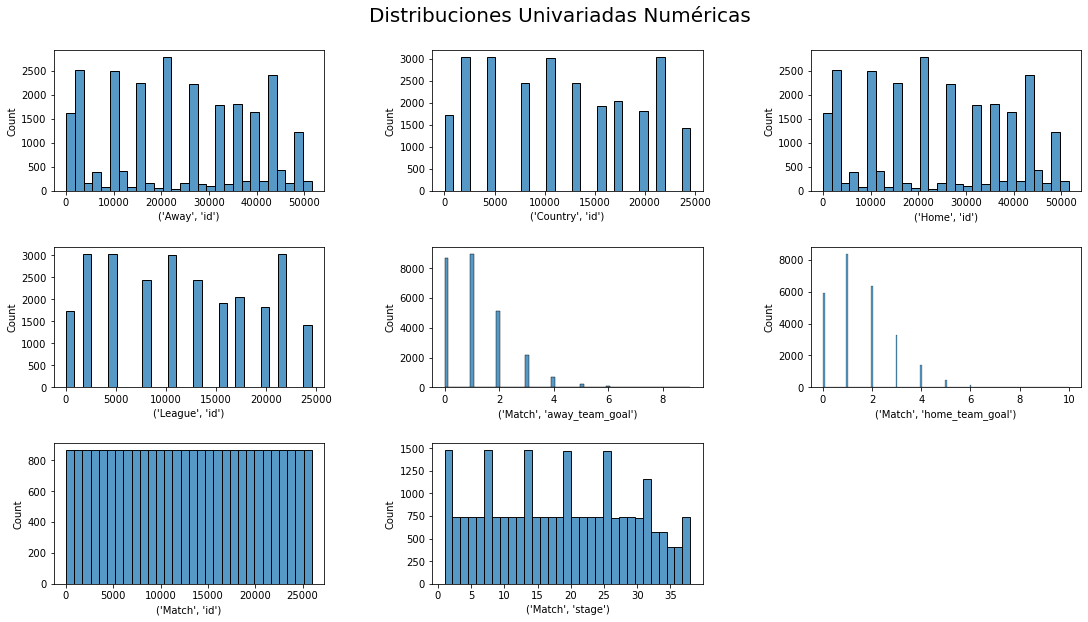

In [10]:
numeric_dist(cols_numeric)

In [11]:
def categoric_dist(cols, ncols=3,df=df, figsize=[15, 8], w=.4, h=.4):    
    # Visualización de la distribución de los datos categóricos

    # Grilla de subplots
    fig, ax = plt.subplots(nrows=int(len(cols)/ncols)+1, ncols=ncols, figsize=[15, 8])
    
    # Se remueven los plots que sobran de la grilla
    list(map(lambda a : a.remove(), ax[-1,(len(cols)%ncols)-ncols:]))

    # Se ajusta el espaciado exterior de la figura
    fig.tight_layout()

    # Se define un titulo y su ubicacion
    fig.suptitle('Distribuciones Univariadas Categóricas',
                 fontsize=20, x=0.5, y=1.05)

    for axis, col in zip(ax.flatten(), cols):
        # Graficos para datos numericos
        sns.countplot(x=col, data = df, ax=axis)
        axis.set_axis_off()
        axis.set_title(col, fontsize = 15)

    # Se ajusta el espaciado interno entre subplots
    plt.subplots_adjust(wspace=w, hspace=h)

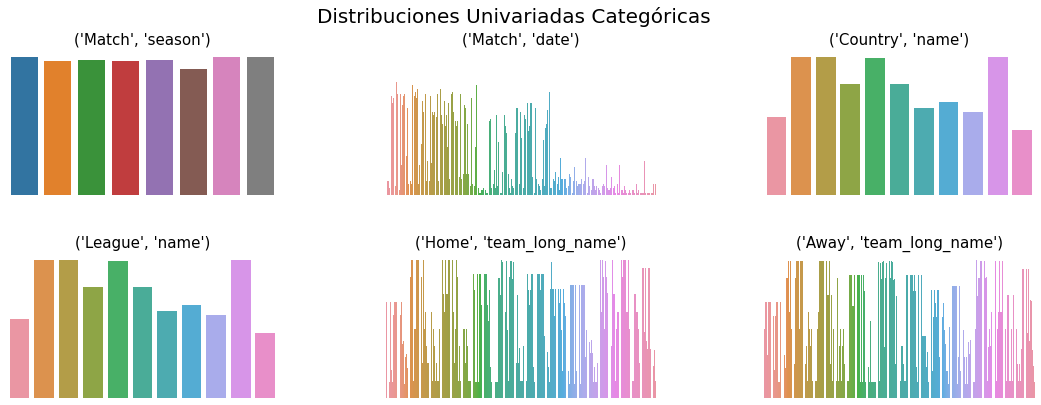

In [12]:
categoric_dist(cols_object)

Se puede observar a partir del gráfico de las variables numéricas, que ('League','id') y ('Country','id') tienen exactamente la misma distribución, por lo que se puede decir que en los datos actuales hay sólo una liga por país, por lo que estas columnas son redundantes.

Por otro lado, se puede ver de las distribuciones de ('Match','home_team_goal') y ('Match','away_team_goal'), que es más probable que se quede sin anotar un gol el equipo visitante que el equipo local.

In [13]:
# Se quita una de las filas redundadntes
final_cols = list(set(filtered_cols) - set([('League','id')]))

### Distribuciones bivariadas

In [14]:
def violinplot(col_x, col_y, df=df, h=.3, w=.1, fontdict = {'fontsize':20}):    
    #Al menos una de las columnas (col_x o col_y) tiene que ser numérica
    # Estrucutra de figura y axes
    fig, ax = plt.subplots(1,1,figsize=[10,5])

    # violin plot --> equivalente a catplot(kind = 'violin')
    sns.violinplot(x=col_x, y=col_y, data=df, kind='violin', ax=ax)

    ax.set_xlabel(col_x[1], fontdict)
    ax.set_ylabel(col_y[1], fontdict)
    ax.set_title('Violin plot '+str(col_x[1])+' vs '+str(col_y[1]), fontdict)

    plt.subplots_adjust(wspace=w, hspace=h)

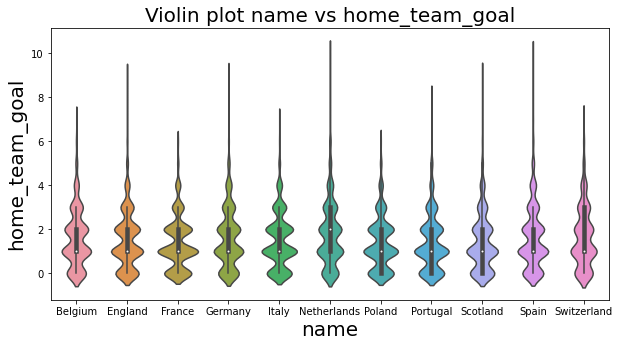

In [15]:
violinplot(('Country','name'),('Match','home_team_goal'))

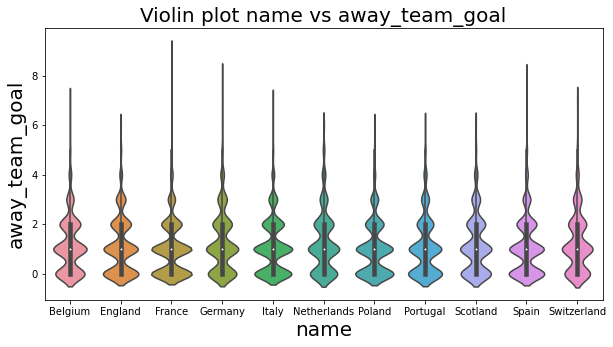

In [16]:
violinplot(('Country','name'),('Match','away_team_goal'))

De los gráficos anteriores se puede ver que:
1. En Países Bajos el promedio de goles de local es mucho mayor al de los demás países.
2. Tanto Países Bajos, como España tienen una gran dispersión en los goles de local.
3. Francia tiene una gran dispersión en los goles de visita.

### Información general

In [17]:
def home_wdl(df=df):
    home_win, draw, home_lose = [], [], []
    for i in df.index:
        if df[('Match','home_team_goal')][i]>df[('Match','away_team_goal')][i]:
            home_win.append(i)
        elif df[('Match','home_team_goal')][i]==df[('Match','away_team_goal')][i]:
            draw.append(i)
        else:
            home_lose.append(i)
    return len(home_win), len(draw), len(home_lose)

home_win, draw, home_lose = home_wdl()

print('De un total de '+str(len(df))+' partidos:')
print('El equipo local ganó '+ str(home_win)+' veces ('+
      str(int(home_win*100/len(df)))+'%)')
print('El partido terminó '+ str(draw)+' veces en empate ('+
      str(int(draw*100/len(df)))+'%)')
print('El equipo visitante ganó '+ str(home_lose)+' veces ('+
      str(int(home_lose*100/len(df)))+'%)')

De un total de 25979 partidos:
El equipo local ganó 11917 veces (45%)
El partido terminó 6596 veces en empate (25%)
El equipo visitante ganó 7466 veces (28%)


### Información por País y Temporada

Se tiene información de 11 países (una liga por país) durante 8 temporadas, de la 2008/2009 a la 2015/2016.

In [18]:
new_cols = ['Country', 'Season', 'Teams', 'Games','Home_wins_perc', 'Draws_perc', 'Home_loses_perc']
data_seasons = pd.DataFrame([], columns = new_cols)
data_seasons = data_seasons.astype({col:'float' for col in new_cols[2:]})
paises = df.Country.name.unique()
seasons = df.Match.season.unique()
for p,s in itertools.product(paises,seasons):
    aux = df[(df.Country.name == p) & (df.Match.season == s)][final_cols]
    teams = len(aux[('Home','id')].unique())
    games = len(aux[('Home','id')])
    home_win, draw, home_lose = home_wdl(aux)
    data_seasons.loc[len(data_seasons),:] = [p,s,teams,games,home_win/games*100, 
                                             draw/games*100, home_lose/games*100]
data_seasons.head()

,Country,Season,Teams,Games,Home_wins_perc,Draws_perc,Home_loses_perc
0,Belgium,2008/2009,18.0,306.0,48.692810,21.895425,29.411765
1,Belgium,2009/2010,15.0,210.0,46.190476,24.285714,29.523810
2,Belgium,2010/2011,16.0,240.0,48.333333,25.833333,25.833333
3,Belgium,2011/2012,16.0,240.0,49.583333,27.083333,23.333333
4,Belgium,2012/2013,16.0,240.0,42.500000,24.583333,32.916667


In [19]:
data_seasons.nlargest(5,'Home_wins_perc')

,Country,Season,Teams,Games,Home_wins_perc,Draws_perc,Home_loses_perc
81,Switzerland,2009/2010,10.0,180.0,55.000000,16.111111,28.888889
42,Netherlands,2010/2011,18.0,306.0,52.287582,23.202614,24.509804
74,Spain,2010/2011,20.0,380.0,51.842105,20.789474,27.368421
50,Poland,2010/2011,16.0,240.0,51.666667,25.000000,23.333333
73,Spain,2009/2010,20.0,380.0,51.052632,25.000000,23.947368


In [20]:
data_seasons.nsmallest(5,'Home_wins_perc')

,Country,Season,Teams,Games,Home_wins_perc,Draws_perc,Home_loses_perc
55,Poland,2015/2016,16.0,240.0,37.916667,30.833333,31.250000
68,Scotland,2012/2013,12.0,228.0,39.035088,32.017544,28.947368
67,Scotland,2011/2012,12.0,228.0,39.473684,25.000000,35.526316
82,Switzerland,2010/2011,10.0,180.0,40.000000,28.333333,31.666667
38,Italy,2014/2015,20.0,379.0,40.105541,31.662269,28.232190


In [21]:
data_seasons.nlargest(5,'Home_loses_perc')

,Country,Season,Teams,Games,Home_wins_perc,Draws_perc,Home_loses_perc
66,Scotland,2010/2011,12.0,228.0,41.228070,21.491228,37.280702
71,Scotland,2015/2016,12.0,228.0,40.789474,22.807018,36.403509
70,Scotland,2014/2015,12.0,228.0,44.736842,19.298246,35.964912
67,Scotland,2011/2012,12.0,228.0,39.473684,25.000000,35.526316
5,Belgium,2013/2014,4.0,12.0,50.000000,16.666667,33.333333


In [22]:
data_seasons.nlargest(5,'Draws_perc')

,Country,Season,Teams,Games,Home_wins_perc,Draws_perc,Home_loses_perc
18,France,2010/2011,20.0,380.0,41.315789,34.210526,24.473684
68,Scotland,2012/2013,12.0,228.0,39.035088,32.017544,28.947368
38,Italy,2014/2015,20.0,379.0,40.105541,31.662269,28.232190
55,Poland,2015/2016,16.0,240.0,37.916667,30.833333,31.250000
53,Poland,2013/2014,16.0,240.0,45.833333,30.416667,23.750000


In [23]:
data_seasons[data_seasons.Country=='Scotland'].mean()

Teams               12.000000
Games              228.000000
Home_wins_perc      41.666667
Draws_perc          24.506579
Home_loses_perc     33.826754
dtype: float64

Con estas tablas podemos ver que:
1. No hay ninguna liga ni temporada en donde los visitantes hayan ganado más que los locales.
2. En la temporada 2010/2011 en Suiza, se podrujo la mayor cantidad porcentual de victorias de los locales (55%)
3. La liga en donde es más fácil ganar de visita es en Escocia, con un promedio de 33.82% de victorias para los visitantes y un máximo de 37.28% en la temporada 2010/2011.

# Pregunta 4

In [24]:
# Nos conectamos nuevamente a la base de datos
conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

# Creamos la query que junta las tablas Player y Player_Attributes
player_query = '''
SELECT *
FROM Player
JOIN Player_Attributes ON Player.id = Player_Attributes.id
'''
cur.execute(player_query)
desc = cur.description
cols = [i[0] for i in desc]

sql_query = pd.read_sql_query(player_query, conn)
df_player= pd.DataFrame(sql_query, columns = cols)
# Terminamos la conexion con la base de datos
cur.close()

df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [25]:
multi_index(cols,['Player', 'Player_Attributes'],df=df_player)

In [26]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Player, id)                              11060 non-null  int64  
 1   (Player, player_api_id)                   11060 non-null  int64  
 2   (Player, player_name)                     11060 non-null  object 
 3   (Player, player_fifa_api_id)              11060 non-null  int64  
 4   (Player, birthday)                        11060 non-null  object 
 5   (Player, height)                          11060 non-null  float64
 6   (Player, weight)                          11060 non-null  int64  
 7   (Player_Attributes, id)                   11060 non-null  int64  
 8   (Player_Attributes, player_fifa_api_id)   11060 non-null  int64  
 9   (Player_Attributes, player_api_id)        11060 non-null  int64  
 10  (Player_Attributes, date)         

# Pregunta 5

Como existen 49 columnas, luego de una inspección (visualización como la que se hace más abajo), utilidad de las columnas y de la existencia de columnas con la misma información (por ejemplo ('Player', 'id') y ('Player_Attributes', 'id')), se decide filtrar 5 columnas explicitadas más abajo y dejar un total de 44 columnas.

In [29]:
cols_to_filter = [('Player','player_api_id'),('Player','player_fifa_api_id'), ('Player_Attributes','id'),
                  ('Player_Attributes','player_fifa_api_id'),('Player_Attributes','player_api_id')
                 ]
player_cols = list(set(df_player.columns) - set(cols_to_filter))

In [31]:
# Juntamos las columnas categóricas
cols_object = [col for col in player_cols if df_player[col].dtype == 'O']
# Juntamos las columnas numéricas
cols_numeric = list(set(player_cols) - set(cols_object))
cols_numeric.sort()

### Distribuciones univariadas de las variables

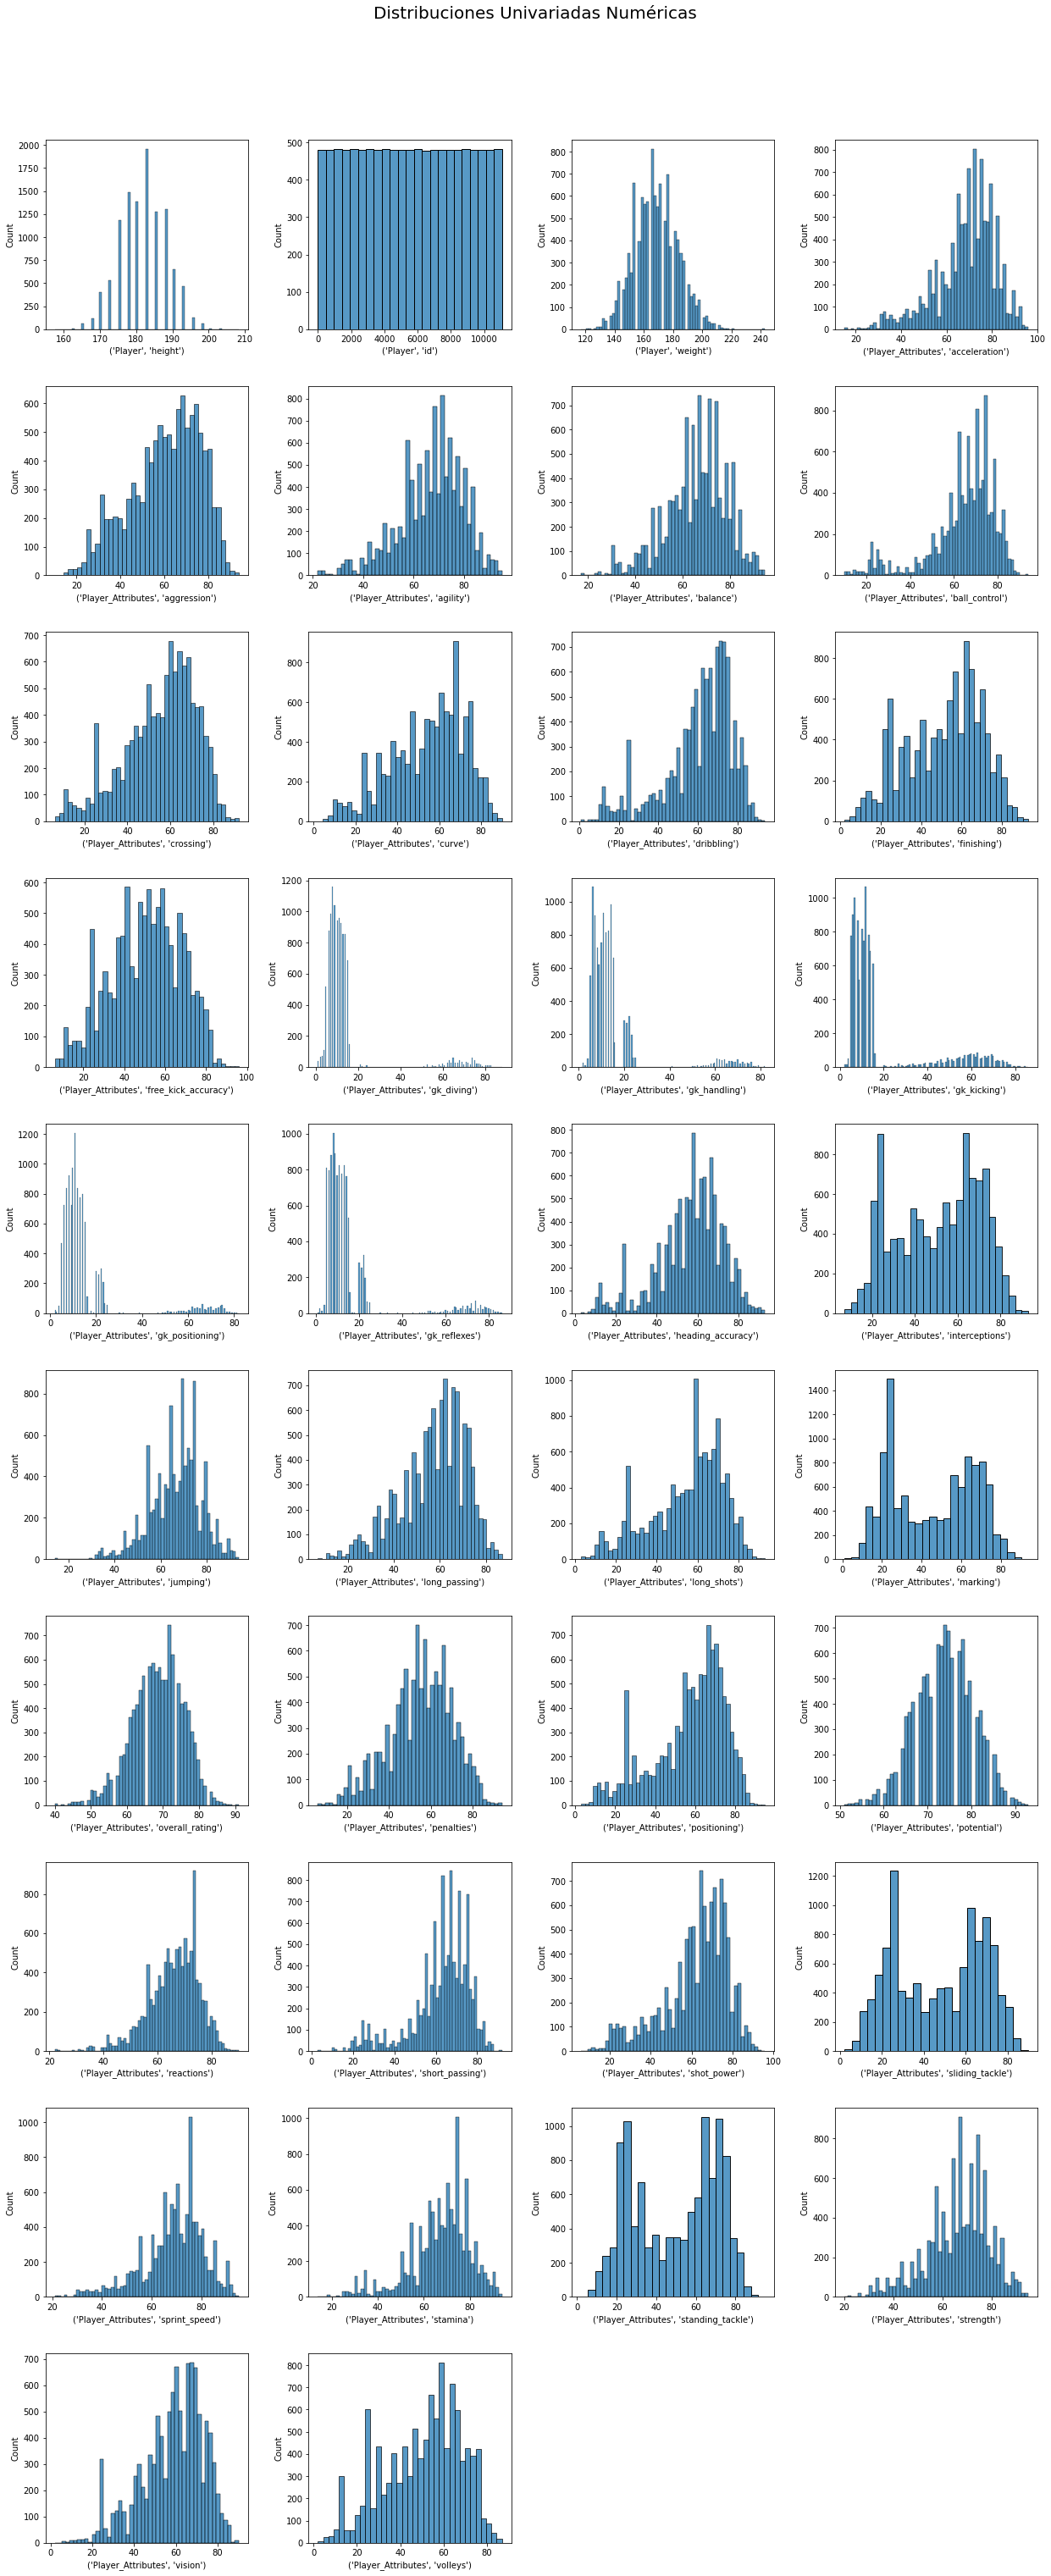

In [35]:
numeric_dist(cols_numeric,df=df_player,ncols=4,figsize=[17,40],w=.3,h=.3)

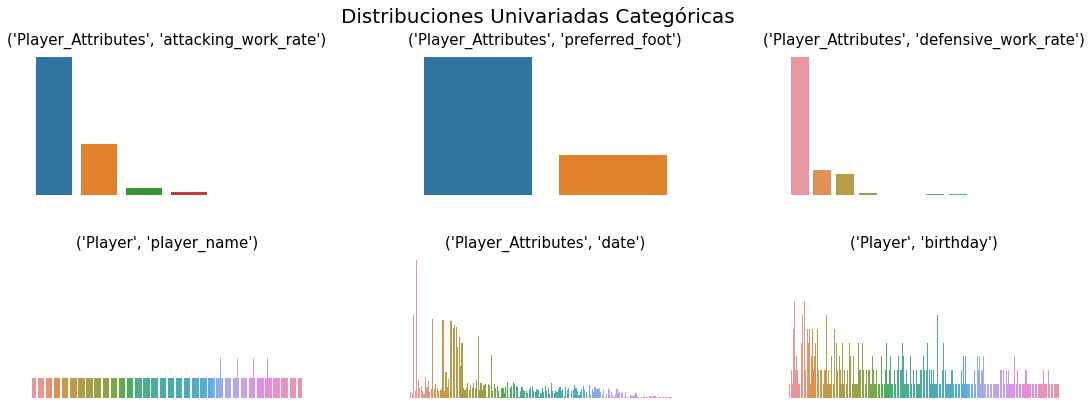

In [33]:
categoric_dist(cols_object,df=df_player)

### Distribuciones bivariadas

Se define la varaible ('Player_Attributes','overall_rating') como variable de interés y se compara la varianza de las demás variables en torno a esta.

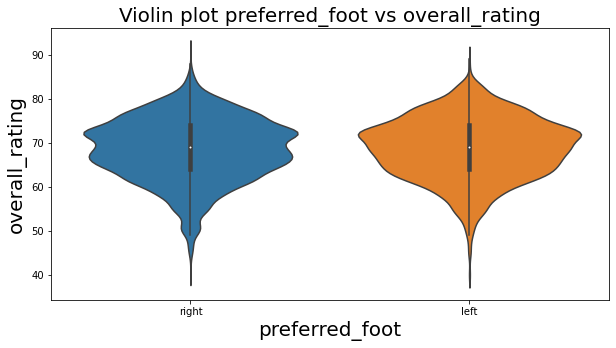

In [34]:
#La variable preferred_foot no genera varaibilidad en sus categorías (similar media y distribución)
violinplot(('Player_Attributes','preferred_foot'),('Player_Attributes','overall_rating'),df=df_player)

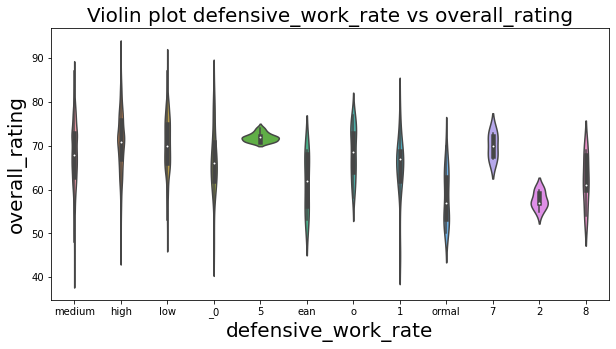

In [317]:
#La variable attacking_work_rate genera poca varaibilidad en sus categorías
violinplot(('Player_Attributes','defensive_work_rate'),('Player_Attributes','overall_rating'),df=df_player)

In [46]:
def scatter_dists(col, df=df, h=.3, w=.1, fontdict={'fontsize': 20}, reg=True):
    ''' 
    Recive una columna numérica y entrega un plot vs la variable de interés y la
    distribución de la columna.
    '''

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2, 1, figsize=[12, 13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    if reg:
        sns.regplot(x=df[col],
                    y=df[('Player_Attributes','overall_rating')],
                    ax=ax[0])
        ax[0].set_title('Regplot plot {} vs overall_rating'.format(col[1]), fontdict)
    else:
        sns.scatterplot(x=col,
                        y=('Player_Attributes','overall_rating'),
                        data=df,
                        ax=ax[0])
        ax[0].set_title('Scatter plot {} vs overall_rating'.format(col[1]), fontdict)

    
    # Distribucion univariada
    sns.distplot(df[col], ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('overall_rating', fontdict)
    ax[1].set_title('Frecuencias {}'.format(col[1]), fontdict)

    plt.subplots_adjust(wspace=w, hspace=h)
    

D:\Users\piper\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


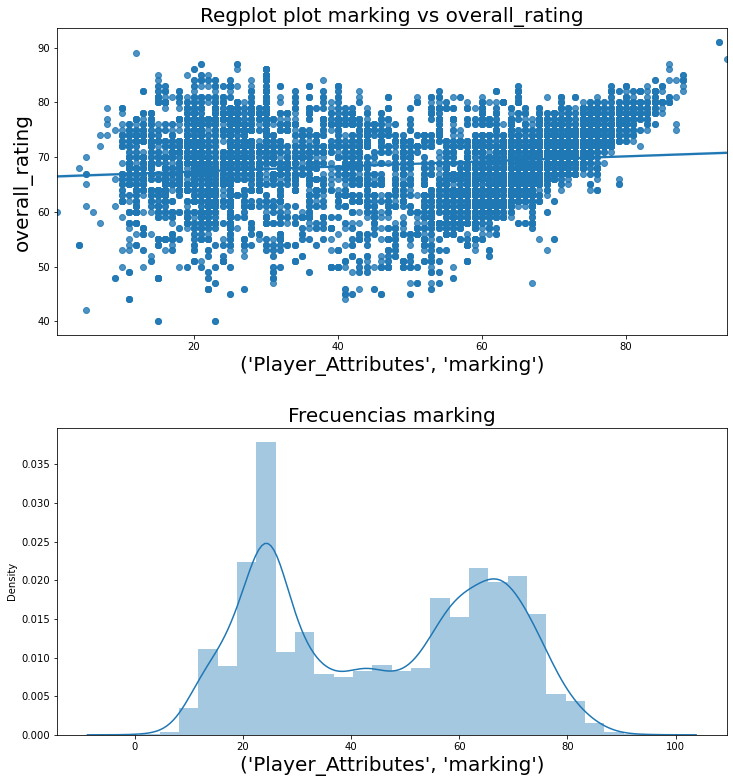

In [71]:
#La variable marking tiene correlación baja con la variable de interés
scatter_dists(('Player_Attributes','marking'), df=df_player)

D:\Users\piper\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


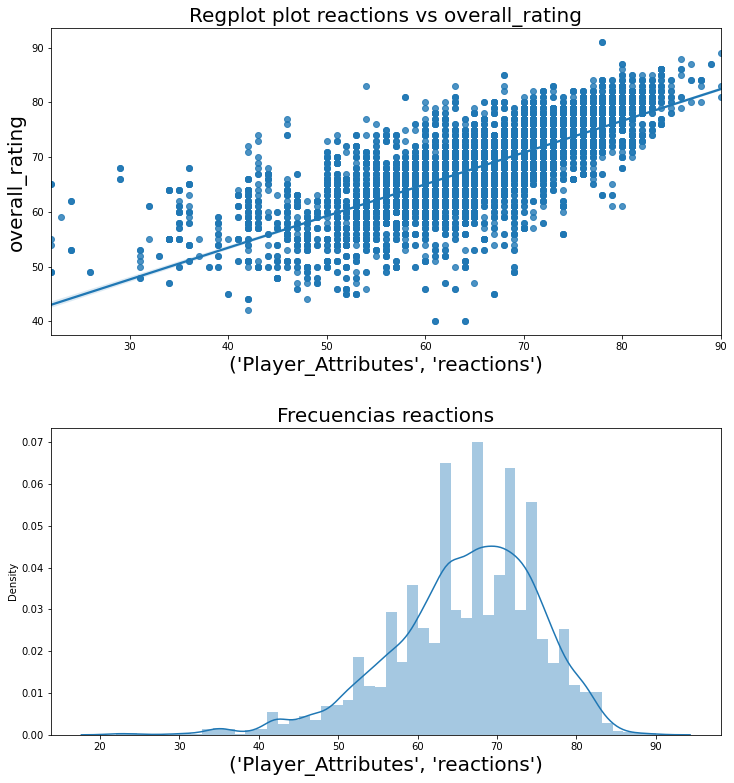

In [66]:
#La variable reactions tiene alta correlación con la variable de interés
scatter_dists(('Player_Attributes','reactions'), df=df_player)

D:\Users\piper\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


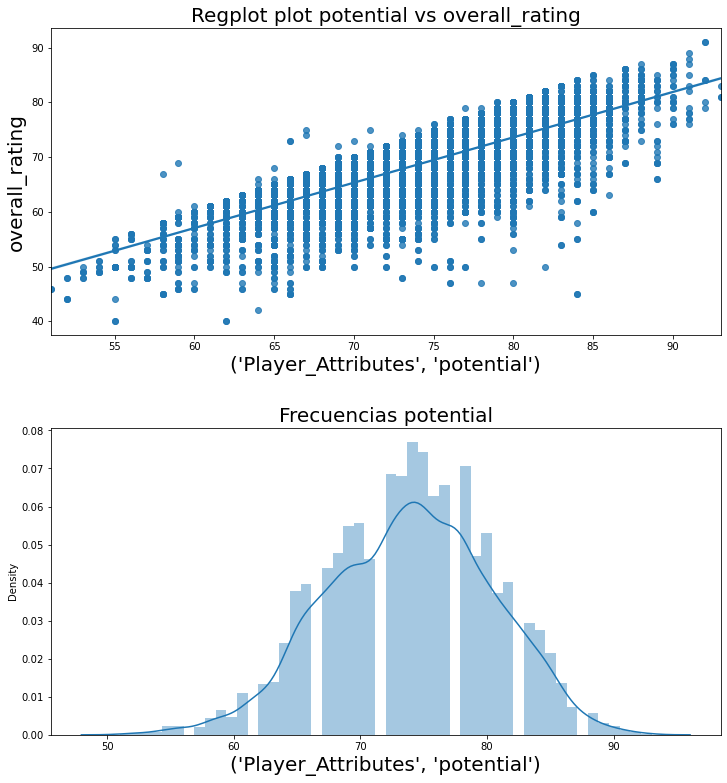

In [49]:
#La variable potential tiene alta correlación con la variable de interés
scatter_dists(('Player_Attributes','potential'), df=df_player)

## Correlaciones entre variables con la variable de interés

### Manejo de valores faltantes

In [103]:
# Jugadores con varaible de interés no nulo
player_not_null = df_player[('Player_Attributes','overall_rating')].notnull()
df_player[cols_numeric].isnull().sum()

Player             height                  0
                   id                      0
                   weight                  0
Player_Attributes  acceleration           39
                   aggression             39
                   agility               125
                   balance               125
                   ball_control           39
                   crossing               39
                   curve                 125
                   dribbling              39
                   finishing              39
                   free_kick_accuracy     39
                   gk_diving              39
                   gk_handling            39
                   gk_kicking             39
                   gk_positioning         39
                   gk_reflexes            39
                   heading_accuracy       39
                   interceptions          39
                   jumping               125
                   long_passing           39
          

Existen 39 jugadores sin información en sus atributos, además hay 7 columnas con 89 valores más faltantes, veremos cómo estas columnas se relacionan con la variable de interés.

In [181]:
# Columnas con valores nulos
null_cols = [('Player_Attributes','agility'), ('Player_Attributes','balance'),
             ('Player_Attributes','dribbling'), ('Player_Attributes','jumping'),
             ('Player_Attributes','sliding_tackle'),('Player_Attributes','vision'),
            ('Player_Attributes','volleys')]

In [162]:
# Correlaciones entre la variables con valores faltantes y la variable de interés.
null_cols.append(col)
corrmat_null = df_player[null_cols].corr()
corrmat_null[col]

Player_Attributes  agility           0.285623
                   balance           0.186089
                   jumping           0.228505
                   sliding_tackle    0.133384
                   overall_rating    1.000000
Name: (Player_Attributes, overall_rating), dtype: float64

De las columnas con valores faltantes se recuperan las siguientes variables por su correlación con 'overall_rating':
1. 'dribbling'
2. 'vision'
3. 'volleys'

Para estas variables, sus valores faltantes se reemplazarán con el promedio de cada variable, las demás variables se eliminarán para los posteriores análisis.

In [133]:
null_cols = [('Player_Attributes','agility'), ('Player_Attributes','balance'),
             ('Player_Attributes','jumping'), ('Player_Attributes','sliding_tackle')]
cols_numeric = list(set(cols_numeric) - set(null_cols))
# Se filtran los 39 jugadores sin información sobre sus atributos y se descartan las variables 
# no relevantes con valores faltantes
df_player_filtered = df_player[cols_numeric][player_not_null]
# Se reemplazan los valores faltantes con el promedio de cada variable
df_player_filtered.fillna(value=df_player_filtered.mean(), inplace = True)

In [150]:
# DataFrame con las variables numéricas
df_player_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11021 entries, 0 to 11059
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   (Player_Attributes, dribbling)           11021 non-null  float64
 1   (Player_Attributes, overall_rating)      11021 non-null  float64
 2   (Player_Attributes, marking)             11021 non-null  float64
 3   (Player_Attributes, gk_reflexes)         11021 non-null  float64
 4   (Player_Attributes, sprint_speed)        11021 non-null  float64
 5   (Player_Attributes, gk_handling)         11021 non-null  float64
 6   (Player, height)                         11021 non-null  float64
 7   (Player_Attributes, reactions)           11021 non-null  float64
 8   (Player_Attributes, penalties)           11021 non-null  float64
 9   (Player_Attributes, gk_diving)           11021 non-null  float64
 10  (Player_Attributes, long_passing)        11021

In [158]:
corrmat = df_player_filtered.corr()

In [175]:
col = ('Player_Attributes','overall_rating')
# Buscamos las variables con mayor correlación (positiva) con la variable de interés 
corrmat.nlargest(16,col)[col]

Player_Attributes  overall_rating        1.000000
                   potential             0.761997
                   reactions             0.757202
                   ball_control          0.509076
                   short_passing         0.509005
                   shot_power            0.490279
                   vision                0.476560
                   long_passing          0.462543
                   long_shots            0.449427
                   positioning           0.441584
                   dribbling             0.430837
                   penalties             0.428442
                   volleys               0.415131
                   curve                 0.414068
                   free_kick_accuracy    0.411065
                   crossing              0.401150
Name: (Player_Attributes, overall_rating), dtype: float64

In [155]:
# Revisamos si hay correlaciones negativas grandes
corrmat.nsmallest(5,col)[col]

Player_Attributes  gk_positioning   -0.052893
                   gk_reflexes      -0.043174
                   gk_handling      -0.040216
                   gk_kicking       -0.019696
                   gk_diving        -0.013293
Name: (Player_Attributes, overall_rating), dtype: float64

No se encuentran variables con gran correlación negativa.
Finalmente, dejamos las variables con correlación mayor a 0.3 con la variable 'overall_rating' y construimos el DataFrame con las variables relevantes en relacion a nuestra variable de interés.

In [177]:
idx = corrmat.nlargest(16,col)[col].index

# Como todas las variables relevantes pertenecen a la tabla 'Player_Attributes', ya deja de ser 
# necesario el multi_índice para las columnas creado.
df_player_relevant = df_player_filtered[idx]
new_idx = [col[1] for col in idx]
df_player_relevant.columns = new_idx
df_player_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11021 entries, 0 to 11059
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overall_rating      11021 non-null  float64
 1   potential           11021 non-null  float64
 2   reactions           11021 non-null  float64
 3   ball_control        11021 non-null  float64
 4   short_passing       11021 non-null  float64
 5   shot_power          11021 non-null  float64
 6   vision              11021 non-null  float64
 7   long_passing        11021 non-null  float64
 8   long_shots          11021 non-null  float64
 9   positioning         11021 non-null  float64
 10  dribbling           11021 non-null  float64
 11  penalties           11021 non-null  float64
 12  volleys             11021 non-null  float64
 13  curve               11021 non-null  float64
 14  free_kick_accuracy  11021 non-null  float64
 15  crossing            11021 non-null  float64
dtypes: f

## Regresión Lineal

In [233]:
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

In [234]:
col = 'overall_rating'

theta_0 = np.zeros(len(new_idx)-1)
X = np.array(df_player_relevant[new_idx[1:]].values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y = np.array(df_player_relevant[col].values)

def rmsq(theta,X,Y):
    Y_pred = pred(X,theta)
    return np.sqrt(sum((Y-Y_pred)**2))

def pred(X,theta):
    return np.dot(X,theta)

In [235]:
res = minimize(rmsq, theta_0, args=(X_scaled, Y), tol=1e-3, method="Powell")
print(res)

   direc: array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 

In [238]:
# Las variables con más peso en la regresión lineal (valor absoluto mayor a 0.3)
new_idx[1:3], new_idx[5:9], new_idx[10:12]

(['potential', 'reactions'],
 ['shot_power', 'vision', 'long_passing', 'long_shots'],
 ['dribbling', 'penalties'])

Basado en la correlación con la variable de interés y el peso en la regresión lineal, las variables que se destacan para elegir a los mejores jugadores son:

1. 'overall_rating' (variable de interés)
2. 'potential'
3. 'reactions'
4. 'shot_power'
5. 'long_passing'
6. 'vision'
7. 'long_shots'
8. 'penalties'
9. 'dribbling'

Todas estas variables se encuentran en la tabla 'Player_Attributes'

# Pregunta BONUS

En general, las variables que destacan para escoger a los mejores jugadores dejan de lado como aptitudes defensivas y de arquero, por lo que si queremos buscar jugadores defensivos tenemos que filtrar características defensivas de forma preeliminar.

### Buscando arquero

In [292]:
# Creamos función para encontrar los mejores jugadores por posición según atributos
def best_ind(pos_att, bound):
    pos_index = set(df_player.index)
    for col in pos_att:
        aux = set(df_player[df_player[('Player_Attributes',col)]>=bound].index)
        pos_index = pos_index.intersection(aux)
    return list(pos_index)

In [308]:
# Attributos de arquero
gk_att = ['gk_reflexes', 'gk_handling', 'gk_positioning', 'gk_kicking', 'gk_diving']

In [305]:
gk_index = best_ind(gk_att,75)
bests_gk = df_player.Player_Attributes.overall_rating[gk_index]
best_3 = bests_gk.nlargest(3).index
df_player.loc[best_3,list(zip(['Player_Attributes']*len(new_idx),new_idx))]

Player_Attributes                                                 \
        overall_rating potential reactions ball_control short_passing   
4544              80.0      83.0      60.0         23.0          37.0   
9039              80.0      80.0      62.0         24.0          35.0   
4545              78.0      80.0      66.0         23.0          37.0   

                                                                      \
     shot_power vision long_passing long_shots positioning dribbling   
4544       39.0   55.0         79.0       23.0        56.0      23.0   
9039       22.0   41.0         75.0       20.0        22.0      24.0   
4545       39.0   55.0         76.0       23.0        56.0      23.0   

                                                          
     penalties volleys curve free_kick_accuracy crossing  
4544      65.0    19.0  19.0               18.0     25.0  
9039      53.0    27.0  19.0                8.0     23.0  
4545      65.0    19.0  19.0               18.0     25.0

In [368]:
# Por inspección de las variables más relevantes se decide al jugador
gk = [4544]

### Buscando defensas

In [313]:
# Atributos particulares de defensas
def_att = ['sliding_tackle', 'marking']

In [333]:
def_index = best_ind(def_att,75)

# Variable categorica defensas por separado
aux = set(df_player[df_player[('Player_Attributes','defensive_work_rate')]=='high'].index)
def_index = list(set(def_index).intersection(aux))

bests_def = df_player.Player_Attributes.overall_rating[def_index]
best_6 = bests_def.nlargest(6).index
df_player.loc[best_6,list(zip(['Player_Attributes']*len(new_idx),new_idx))]

Player_Attributes                                                 \
        overall_rating potential reactions ball_control short_passing   
6522              91.0      92.0      78.0         69.0          54.0   
6523              91.0      92.0      78.0         69.0          54.0   
6521              88.0      91.0      86.0         76.0          77.0   
6516              85.0      85.0      81.0         70.0          68.0   
6519              85.0      90.0      82.0         79.0          74.0   
6327              84.0      88.0      85.0         75.0          75.0   

                                                                      \
     shot_power vision long_passing long_shots positioning dribbling   
6522       65.0   76.0         34.0       39.0        89.0      52.0   
6523       65.0   76.0         34.0       39.0        89.0      52.0   
6521       48.0   76.0         66.0       32.0        90.0      57.0   
6516       48.0   55.0         66.0       34.0        37.0      54.0   
6519       48.0   76.0         66.0       34.0        88.0      54.0   
6327       54.0   70.0         65.0       28.0        87.0      55.0   

                                                          
     penalties volleys curve free_kick_accuracy crossing  
6522      92.0    37.0  46.0               25.0     42.0  
6523      92.0    37.0  46.0               92.0     42.0  
6521      92.0    37.0  46.0               25.0     36.0  
6516      42.0    37.0  46.0               25.0     36.0  
6519      88.0    37.0  46.0               25.0     36.0  
6327      90.0    48.0  48.0               32.0     37.0

In [358]:
# Todos los jugadores de la lista son diestros
df_player.loc[best_5,('Player_Attributes','preferred_foot')]

6522    right
6523    right
6521    right
6516    right
6519    right
Name: (Player_Attributes, preferred_foot), dtype: object

In [374]:
# Por inspección de las variables más relevantes se decide a los jugadores
defense = [6522, 6523, 6521, 6519]

### Buscando mediocampistas

In [356]:
# Atributos particulares de mediocampistas
mid_att = ['interceptions', 'short_passing', 'positioning', 'ball_control', 'dribbling']

In [362]:
mid_index = best_ind(mid_att,75)

# Variable categorica mediocampistas por separado
aux = set(i for i in mid_index if (df_player.Player_Attributes.defensive_work_rate[i] 
          in ['medium','high']) and (df_player.Player_Attributes.attacking_work_rate[i] 
          in ['medium','high']))
mid_index = list(set(mid_index).intersection(aux))

bests_mid = df_player.Player_Attributes.overall_rating[mid_index]
best_6 = bests_mid.nlargest(6).index
df_player.loc[best_6,list(zip(['Player_Attributes']*len(new_idx),new_idx))]

Player_Attributes                                                 \
        overall_rating potential reactions ball_control short_passing   
9900              85.0      87.0      80.0         85.0          80.0   
9901              85.0      87.0      80.0         85.0          80.0   
166               84.0      87.0      84.0         88.0          77.0   
9899              84.0      87.0      81.0         84.0          76.0   
4726              83.0      89.0      82.0         84.0          89.0   
4645              82.0      88.0      76.0         87.0          83.0   

                                                                      \
     shot_power vision long_passing long_shots positioning dribbling   
9900       83.0   80.0         63.0       84.0        82.0      82.0   
9901       89.0   80.0         63.0       84.0        82.0      82.0   
166        69.0   79.0         59.0       62.0        77.0      90.0   
9899       83.0   80.0         63.0       78.0        82.0      86.0   
4726       88.0   83.0         86.0       91.0        80.0      85.0   
4645       78.0   81.0         75.0       76.0        75.0      87.0   

                                                          
     penalties volleys curve free_kick_accuracy crossing  
9900      82.0    77.0  68.0               69.0     71.0  
9901      82.0    77.0  68.0               69.0     71.0  
166       84.0    69.0  62.0               53.0     82.0  
9899      82.0    77.0  68.0               69.0     71.0  
4726      78.0    76.0  76.0               70.0     79.0  
4645      84.0    77.0  82.0               60.0     85.0

In [375]:
# Por inspección de las variables más relevantes se decide a los jugadores
midfielders = [9900, 9901, 4726, 9899]

### Buscando delanteros

In [359]:
# Atributos particulares de delanteros
for_att = ['heading_accuracy', 'finishing', 'positioning', 'agility', 'sprint_speed']

In [364]:
for_index = best_ind(for_att,75)

# Variable categorica delanteros por separado
aux = set(df_player[df_player[('Player_Attributes','attacking_work_rate')]=='high'].index)
for_index = list(set(for_index).intersection(aux))

bests_for = df_player.Player_Attributes.overall_rating[for_index]
best_6 = bests_for.nlargest(6).index
df_player.loc[best_6,list(zip(['Player_Attributes']*len(new_idx),new_idx))]

Player_Attributes                                                 \
        overall_rating potential reactions ball_control short_passing   
8287              85.0      90.0      81.0         86.0          75.0   
8286              84.0      90.0      81.0         86.0          75.0   
8290              84.0      92.0      87.0         86.0          75.0   
8291              84.0      92.0      87.0         86.0          75.0   
8187              84.0      88.0      84.0         84.0          79.0   
8285              83.0      90.0      80.0         85.0          74.0   

                                                                      \
     shot_power vision long_passing long_shots positioning dribbling   
8287       83.0   71.0         59.0       78.0        87.0      85.0   
8286       81.0   71.0         59.0       74.0        87.0      84.0   
8290       83.0   77.0         58.0       80.0        82.0      89.0   
8291       83.0   77.0         58.0       80.0        82.0      89.0   
8187       84.0   76.0         68.0       78.0        86.0      85.0   
8285       78.0   70.0         53.0       70.0        81.0      83.0   

                                                          
     penalties volleys curve free_kick_accuracy crossing  
8287      77.0    81.0  83.0               71.0     70.0  
8286      77.0    83.0  79.0               67.0     67.0  
8290      79.0    82.0  77.0               67.0     70.0  
8291      79.0    82.0  77.0               67.0     70.0  
8187      82.0    83.0  74.0               73.0     68.0  
8285      78.0    80.0  78.0               63.0     68.0

In [365]:
# Todos los jugadores de la lista son diestros
df_player.loc[best_6,('Player_Attributes','preferred_foot')]

8287    right
8286    right
8290    right
8291    right
8187    right
8285    right
Name: (Player_Attributes, preferred_foot), dtype: object

In [366]:
# Por inspección de las variables más relevantes se decide a los jugadores
forwards = [8287, 8286]

### Equipo escogido

In [380]:
print('Los jugadores escogidos para formar el equipo ideal son')
print('Arquero: ')
print([[df_player.loc[i,('Player','player_name')],i] for i in gk])
print('Defensas:')
print([[df_player.loc[i,('Player','player_name')],i] for i in defense])
print('Mediocampistas:')
print([[df_player.loc[i,('Player','player_name')],i] for i in midfielders])
print('Delanteros:')
print([[df_player.loc[i,('Player','player_name')],i] for i in forwards])

Los jugadores escogidos para formar el equipo ideal son
Arquero: 
[['Jake Taylor', 4544]]
Defensas:
[['Manu Molina', 6522], ['Manu Torres', 6523], ['Manu Lanzarote', 6521], ['Manu Fernandez', 6519]]
Mediocampistas:
[['Stefan Maierhofer', 9900], ['Stefan Mitrovic', 9901], ['Javier Flano', 4726], ['Stefan Lex', 9899]]
Delanteros:
[['Papa Bouba Diop', 8287], ['Paolo Zanetti', 8286]]
